In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

Imported class `Arbitrage(data : pd.DataFrame)` with methods `show_plot()`, `get_test_results()`
Imported function `get_value_data(files, columns)` -> dataframe of values
Imported function `get_value_data(files, columns)` -> dataframe of returns
Imported function `initialize_data()` -> tuple of value and returns data
Imported PairTradingTest
0.18187173709993393
0.3538758656001613
0.004085227224692463
0.6083708071041048
0.4966055703670485
0.43918531549258083
0.37889792645732717
0.08313195873856188
0.23526149661460916
0.15089704749024102
0.13538734816825204
0.1007094351108937
0.3877013412891899
0.7081701441335445
0.6048595730629904
0.5417681241161835
0.37871872762255654
0.33674903263165556
0.33899525054154556
0.3843054369809631
0.27921168518467243
0.17083602580130303
0.0714477537245617
0.24330901451323822
0.20357821136584558
0.24532463655749542
0.23013869587643565
0.2510816917700768
0.1747447347611914
0.24201383675303784
0.0685906123656545
0.04470521403886378
0.05227159425391207
0.133896

<Figure size 1000x600 with 0 Axes>

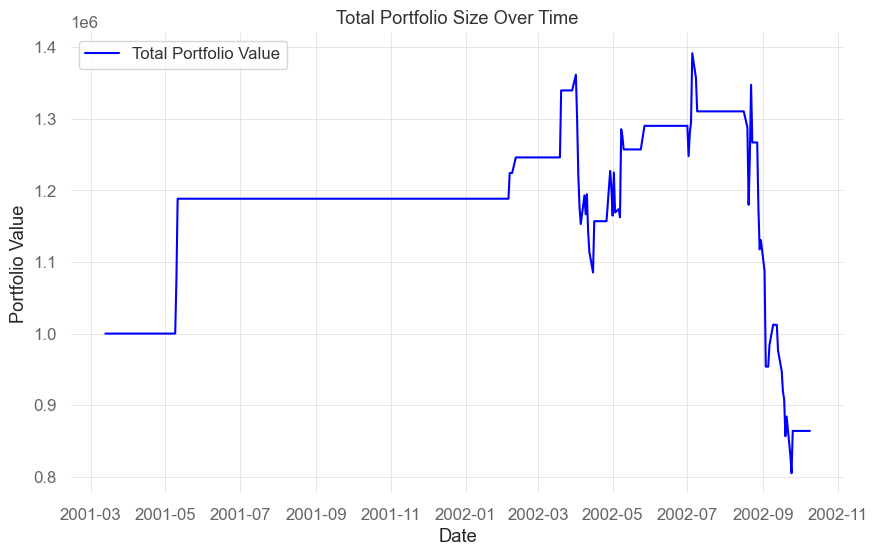

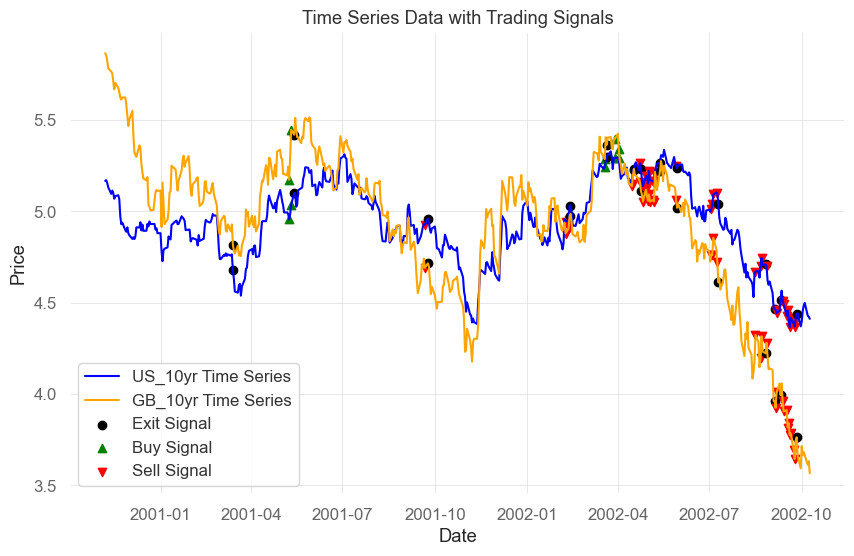

<Figure size 1000x600 with 0 Axes>

In [11]:
%run support.py
%run data.py


In [12]:
series = {"US_10yr_2000.csv": "US_10yr", "GB_10yr_2000.csv": "GB_10yr"}
data = initialize_data(**series)
coint(data.data.iloc[:,0],data.data.iloc[:,1])

(-2.9934243705489187,
 0.11177679950857483,
 array([-3.89827144, -3.33715143, -3.04515895]))

# Rudimentary Pair Trading Strategy based on cointegration

0.12484383005135585
0.010224729593771392
0.48939433075056205
0.03611008732515317
0.4309285169976179
0.6828537213154801
0.5222004664801486
0.6894194261267407
0.5925016364471296
0.5861167975734571
0.6179805301315406
0.6123768222259374
0.596519599652503
0.6139580565108568
0.536866297101574
0.695423508559821
0.726756089547034
0.4517408540968876
0.37438960714317776
0.4022504271237782
0.44070374787505384
0.3924667856238493
0.6823408841679232
0.6305391577616803
0.4807869219609215
0.12264855209567083
0.17361015842448907
0.02932368859931012
0.294913663617854
0.21957731197985897
0.22945679931514062
0.18641401178823552
0.26289557727872387
0.18455508730772097
0.19867540416451995
0.20363633936864034
0.32160861677164937
0.24751434868647254
0.2289468875522782
0.07543145712343018
0.022402990088552864
0.009134808837998942
0.011220196127892698
0.011405653325239002
0.015570697908347312
0.016410970699955084
0.011918709433034035
0.011825990955760615
0.007919028545897645
0.008209372462093238
0.0040896473541

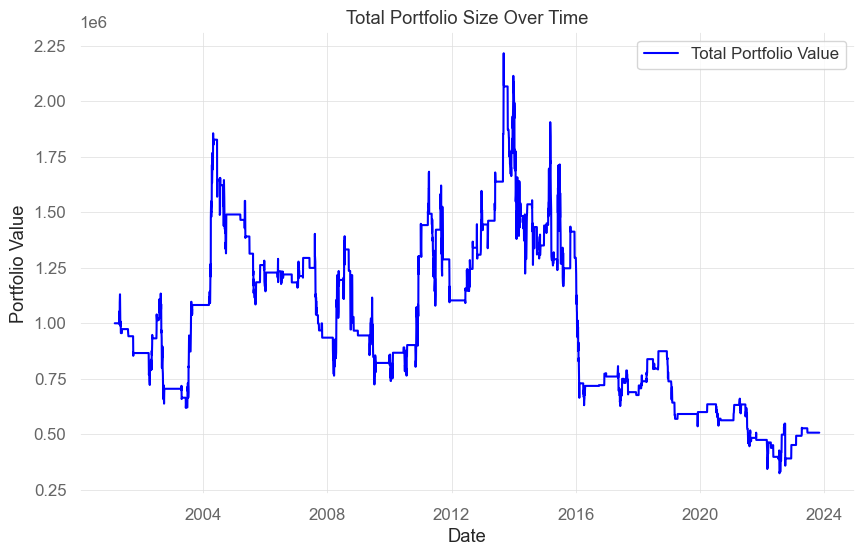

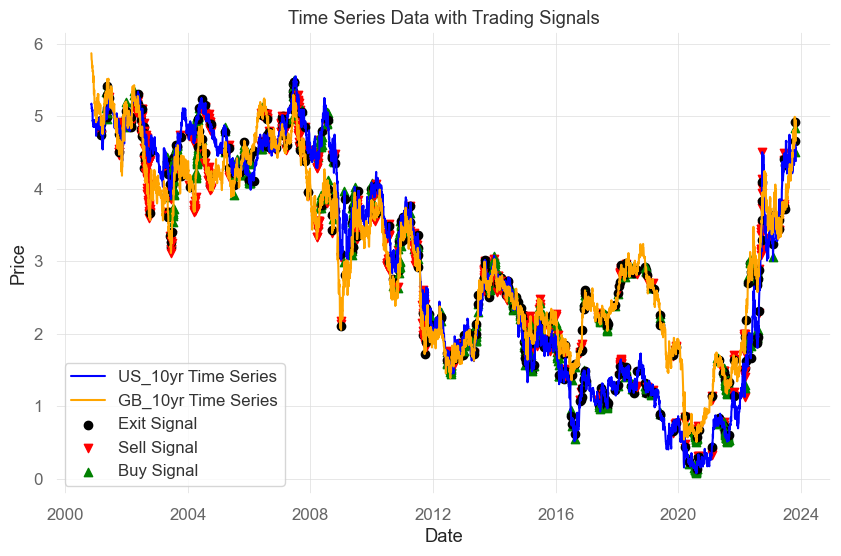

In [13]:
# Given a linear combination (analyzed from prior juypter notebooks) of the price data of two bonds at each time point
# When the zero score goes above or below 95% threshold, i.e. there is only a 5% probability that the bonds price should be in that range, 
# know that the bonds are likely diverging and should converge
# Our signal is this divergence.
# Buy when Z score +- 2, and sell when the z-score dips back within the +- 2 band.

strategy :PairTradingTest = PairTradingTest(data,40,.8)
strategy.__backtest__()
strategy.plot_portfolio_over_time()
strategy.plot_time_series_with_signals()


In [14]:
# indicies
series = {"PanEuroAggIdx_2000.csv": "PanEuroIdx", "JPY_10yr_2000.csv": "JPY_10yr"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

            PanEuroIdx  JPY_10yr
Date                            
2000-11-07       1.815  104.9184
2000-11-08       1.810  104.8983
2000-11-09       1.800  104.9480
2000-11-10       1.804  105.0228
2000-11-13       1.776  105.3412
2000-11-14       1.782  105.2628
2000-11-15       1.780  105.2965
2000-11-21       1.704  105.5359
2000-11-22       1.710  105.8350
2000-11-24       1.673  105.8363
2000-11-27       1.683  105.9237
2000-11-28       1.703  106.0469
2000-11-29       1.670  106.0182
2000-11-30       1.615  106.0956
2000-12-01       1.629  106.2325
2000-12-04       1.639  106.4320
2000-12-05       1.599  106.4390
2000-12-06       1.623  106.5262
2000-12-07       1.563  106.4982
2000-12-08       1.589  106.4948
2000-12-11       1.635  106.7226
2000-12-12       1.640  106.6656
2000-12-13       1.689  106.9789
2000-12-14       1.654  107.0914
2000-12-15       1.640  107.1796
2000-12-18       1.682  107.2872
2000-12-19       1.645  107.1088
2000-12-20       1.576  107.0988
2000-12-21

(-2.875118680627169,
 0.14294930080257934,
 array([-3.89834602, -3.33719302, -3.04518781]))

0.3181003293136998
0.14573184199388012
0.3118280162593846
0.11354131678832052
0.03266286361848358
0.3463976248248023
0.36829326249076066
0.2219568889836796
0.3426621173933474
0.36312410176776944
0.4834149990323622
0.8886633318068315
0.899356739066911
0.6768064510134003
0.767896939879257
0.926972351332913
0.9496829510925364
0.9426213204955289
0.9474399876287274
0.9427351078318782
0.8708909792729914
0.7641019500607977
0.6840600477919866
0.6292725171793733
0.5063078983283599
0.7962296847405204
0.7293856102851621
0.7263626484185082
0.5323734235323225
0.48297398208566256
0.2024588504951345
0.038734488669153834
0.17671865609222126
0.009671049364428416
0.07136923992257346
0.06570626990031718
0.06222496043285949
0.042834201236054505
0.02211211758325231
0.9244585617667327
0.9526110156603965
0.9591055345564252
0.9568241254493389
0.0037180753880228885
6.313327120197627e-05
0.008449747606182799
0.1623427146296676
0.1273155673359324
0.12573217030577716
0.17533585036803978
0.16699441117091407
0.2130

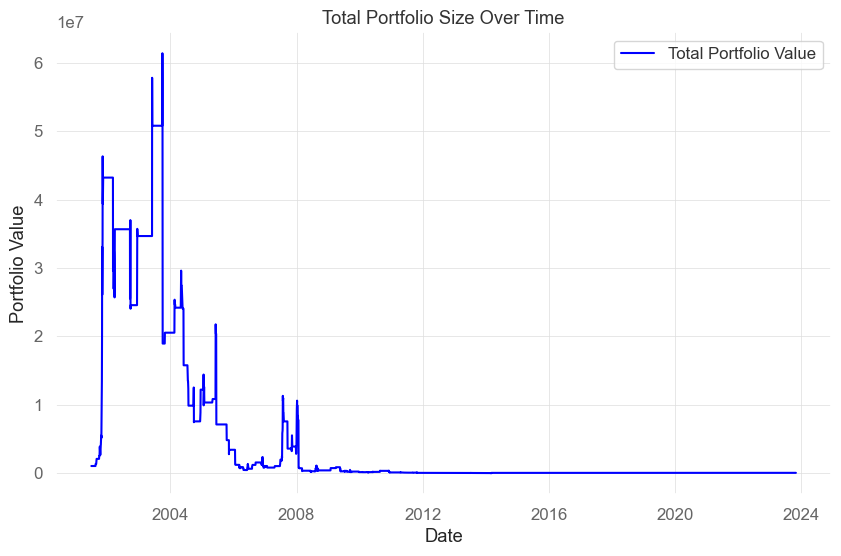

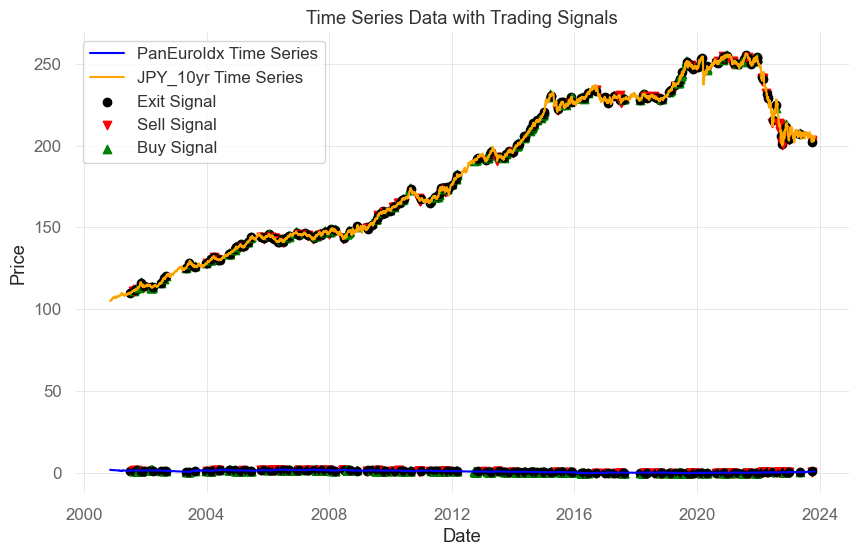

In [15]:
strategy :PairTradingTest = PairTradingTest(idx_data,30,1)
strategy.__backtest__()
strategy.plot_portfolio_over_time()
strategy.plot_time_series_with_signals()

**How did the portfolio go negative?**

In [7]:
# try some other combinations

# How is there no cointegration between the US bond and US Index
series = {"USAggIdx_2000.csv": "US_15Min", "US_10yr_2000.csv": "GB_15Min"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

            US_15Min  GB_15Min
Date                          
2000-11-07    897.54    5.8660
2000-11-08    898.10    5.8550
2000-11-09    899.86    5.8250
2000-11-10    899.97    5.7830
2000-11-13    901.83    5.7660
...              ...       ...
2023-10-27   1998.02    4.8346
2023-10-30   1994.02    4.8942
2023-10-31   1992.08    4.9307
2023-11-01   2011.47    4.7341
2023-11-02   2023.84    4.6590

[5756 rows x 2 columns]


(-0.7422650049610598,
 0.9418800386372319,
 array([-3.89834404, -3.33719191, -3.04518704]))

In [8]:
series = {"PanEuroAggIdx_2000.csv": "US_15Min", "US_10yr_2000.csv": "GB_15Min"}
idx_data = initialize_data(**series)
print(idx_data.data)
coint(idx_data.data.iloc[:,0],idx_data.data.iloc[:,1])

            US_15Min  GB_15Min
Date                          
2000-11-07  104.9184    5.8660
2000-11-08  104.8983    5.8550
2000-11-09  104.9480    5.8250
2000-11-10  105.0228    5.7830
2000-11-13  105.3412    5.7660
...              ...       ...
2023-10-27  204.0118    4.8346
2023-10-30  204.1771    4.8942
2023-10-31  204.5729    4.9307
2023-11-01  205.1713    4.7341
2023-11-02  205.9037    4.6590

[5828 rows x 2 columns]


(-1.3869631131282647,
 0.8019469812738041,
 array([-3.8983205 , -3.33717879, -3.04517793]))

0.0033845623439995418
0.0033845623439995418
0.0028105421096943023
0.010805210660556314
0.16832646891776765
0.4302453241931611
0.10382081529195403
0.1994185061667052
0.15095715463371345
0.16719514583953615
0.06732942189376237
0.009617736053574393
0.13501486265653395
0.14409300555672033
0.14896479547518504
0.18365216412550356
0.20977105508290345
0.18088112659196087
0.21759325921933292
0.25153504143744443
0.3431435474712433
0.2889917536977835
0.29245599294082114
0.2552342507132571
0.29735376939123137
0.5187781385342652
0.416106078589426
0.36540396293646915
0.19473163509554303
0.07553215824289522
0.4519478000546393
0.3981738230567846
0.02318939025734862
0.579723117270509
0.5520056275609493
0.6919399316031161
0.8897557276354224
0.6230593710538186
0.011568820892277476
0.41976454180424494
0.9153598215185879
0.8177394930589463
0.7192343099691803
0.5778062818496074
0.5292617687321134
0.5868808925568785
0.37512200115862104
0.19816054345652645
0.23486528799688
0.6134014389010747
0.116479137172072

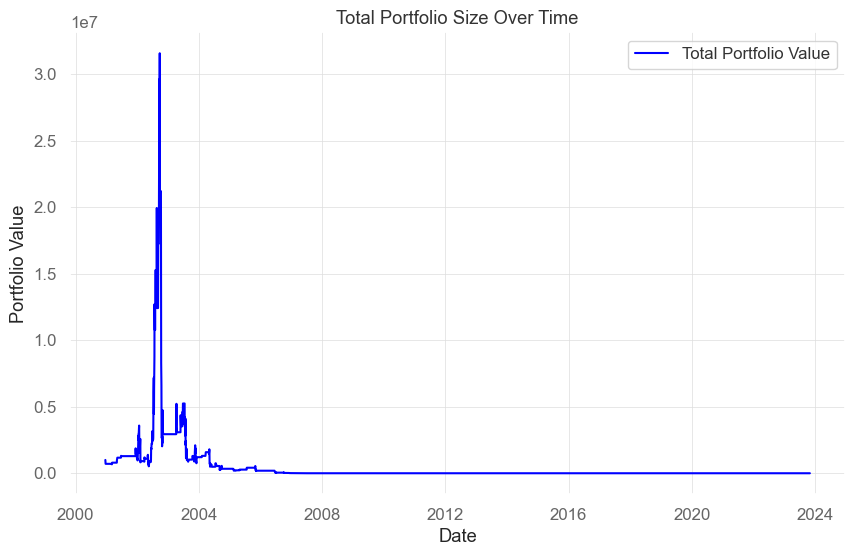

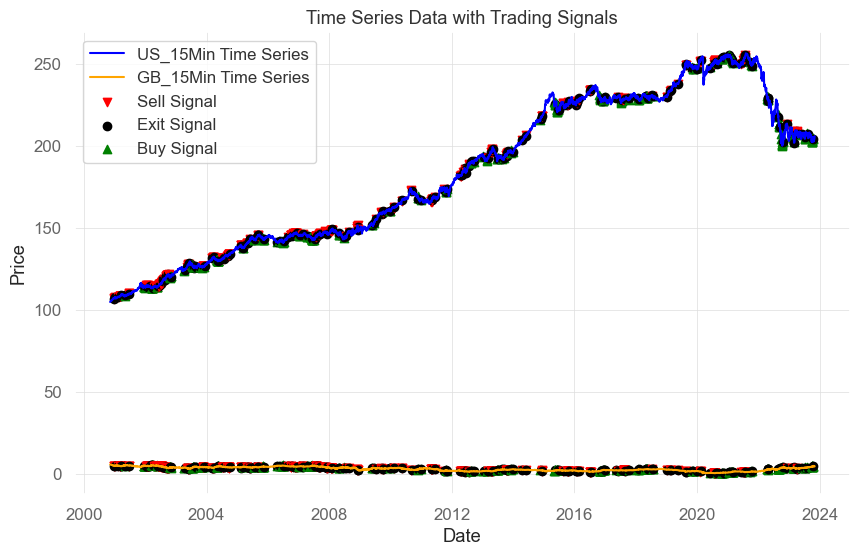

In [9]:
strategy :PairTradingTest = PairTradingTest(idx_data,30,1)
strategy.__backtest__()
strategy.plot_portfolio_over_time()
strategy.plot_time_series_with_signals()

In [10]:
pd.set_option('display.max_rows', None)
print(strategy.portfolio)

            US_15Min_Position  GB_15Min_Position  Cash_Position
Date                                                           
2000-12-18       9.502353e+05       4.976473e+04   0.000000e+00
2000-12-19       7.900007e+05       4.137309e+04   0.000000e+00
2000-12-20       7.767409e+05       4.048558e+04   0.000000e+00
2000-12-21       6.731799e+05       3.489464e+04   0.000000e+00
2000-12-22       0.000000e+00       0.000000e+00   7.080746e+05
2000-12-27       0.000000e+00       0.000000e+00   7.080746e+05
2000-12-28       0.000000e+00       0.000000e+00   7.080746e+05
2000-12-29       0.000000e+00       0.000000e+00   7.080746e+05
2001-01-02       0.000000e+00       0.000000e+00   7.080746e+05
2001-01-03       0.000000e+00       0.000000e+00   7.080746e+05
2001-01-04       0.000000e+00       0.000000e+00   7.080746e+05
2001-01-05       6.744251e+05       3.364944e+04   0.000000e+00
2001-01-08       0.000000e+00       0.000000e+00   7.080746e+05
2001-01-09       0.000000e+00       0.00